In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Дискретные сигналы

In [2]:
def generate_bin_sign(hand_control=False, change_items={}, initial_val=0, frequency_sec='1s', duration_hours=0.2,
                      today_date=str(pd.Timestamp("today").date()), start_time="00:00:00"):
    '''
    Генерирует дискретный бинарный сигнал за указанный период.

    Функция может работать в двух режимах:
    1. Ручное управление - сигнал формируется по заданным временным точкам и значениям
    2. Автоматический режим - сигнал генерируется с чередованием значений 0 и 1

    Args:
        hand_control (bool, optional): Флаг ручного управления. Если True, используются change_items.
                                      По умолчанию False.
        change_items (dict, optional): Словарь с ручными изменениями сигнала в формате
                                      {'HH:MM:SS': value}. По умолчанию {}.
        initial_val (int, optional): Начальное значение сигнала (0 или 1). По умолчанию 0.
        frequency_sec (str, optional): Частота генерации точек (pandas frequency string).
                                      По умолчанию '1s'.
        duration_hours (float, optional): Длительность сигнала в часах. По умолчанию 0.2.
        today_date (str, optional): Дата в формате 'YYYY-MM-DD'. По умолчанию текущая дата.
        start_time (str, optional): Время начала сигнала в формате 'HH:MM:SS'.
                                  По умолчанию "00:00:00".

    Returns:
        pd.DataFrame: DataFrame с колонками:
            - time: Временные метки
            - signal: Значения бинарного сигнала
    '''
    if hand_control == True:
      timestamp_items = {pd.Timestamp(today_date + ' ' + time_str): val for time_str, val in change_items.items()}
      timestamp_items = dict(sorted(timestamp_items.items()))
      data = pd.DataFrame({'time': list(timestamp_items.keys()),
                           'signal': list(timestamp_items.values())})
      return data

    if hand_control == False:
      duration_sec = duration_hours * 3600

      full_start_time = pd.Timestamp(today_date + ' ' + start_time)
      full_end_time = full_start_time + pd.Timedelta(seconds=duration_sec)

      # Генерация времени каждого сигнала
      time_steps = pd.date_range(start=str(full_start_time), end=str(full_end_time), freq=frequency_sec)
      msecs = time_steps.microsecond // 1000
      time_steps = time_steps.floor('s')

      # Создание DataFrame с колонками "Сигнал" и "Время"
      data = pd.DataFrame({'time': time_steps,
                           'signal': np.tile([initial_val, (initial_val+1)%2], int(np.ceil(len(time_steps)/2)))[:len(time_steps)]})

      #Возвращение DataFrame
      return data

In [3]:
data = generate_bin_sign()
data.head(10)

,time,signal
0,2025-05-13 00:00:00,0
1,2025-05-13 00:00:01,1
2,2025-05-13 00:00:02,0
3,2025-05-13 00:00:03,1
4,2025-05-13 00:00:04,0
5,2025-05-13 00:00:05,1
6,2025-05-13 00:00:06,0
7,2025-05-13 00:00:07,1
8,2025-05-13 00:00:08,0
9,2025-05-13 00:00:09,1


In [4]:
def convert_to_dis_data(FieldTime, PVId, Value, MSec=0, PVType=1, HistState=32, UserNr=-1, AnaValue=0, PVState=2.656, ValueAscii='NaN',
                        PVStateAscii='my:G SN100', Text='NaN', UserText='NaN', OldPVState=2.656, OldValue=1, BitNr=-1):
    '''
    Преобразует данные дискретного сигнала в DataFrame, готовый для выгрузки в архив.

    Создает pandas DataFrame с заданными параметрами сигнала в соответствии
    с требуемой структурой данных для архивного хранения дискретных сигналов.

    Args:
        FieldTime: Массив временных меток (datetime)
        PVId: Идентификатор технологической переменной
        Value: Массив значений сигнала
        MSec (int, optional): Массив миллисекунд для временных меток. По умолчанию 0.
        PVType (int, optional): Тип технологической переменной. По умолчанию 1.
        HistState (int, optional): Состояние истории. По умолчанию 32.
        UserNr (int, optional): Идентификатор пользователя. По умолчанию -1.
        AnaValue (float, optional): Аналоговое значение. По умолчанию 0.
        PVState (float, optional): Состояние переменной. По умолчанию 2.656.
        ValueAscii (str, optional): Значение в ASCII формате. По умолчанию 'NaN'.
        PVStateAscii (str, optional): Текстовое описание состояния. По умолчанию 'my:G SN100'.
        Text (str, optional): Текстовое описание. По умолчанию 'NaN'.
        UserText (str, optional): Пользовательский текст. По умолчанию 'NaN'.
        OldPVState (float, optional): Предыдущее состояние переменной. По умолчанию 2.656.
        OldValue (int, optional): Предыдущее значение. По умолчанию 1.
        BitNr (int, optional): Номер бита. По умолчанию -1.

    Returns:
        pd.DataFrame: DataFrame с колонками:
            - FieldTime
            - MSec
            - PVId
            - Value
            - PVType
            - HistState
            - UserNr
            - AnaValue
            - PVState
            - ValueAscii
            - PVStateAscii
            - Text
            - UserText
            - OldPVState
            - OldValue
            - BitNr
    '''
    df = pd.DataFrame({
        'FieldTime': FieldTime,
        'MSec': MSec,
        'PVId': PVId,
        'Value': Value,
        'PVType': PVType,
        'HistState': HistState,
        'UserNr': UserNr,
        'AnaValue': AnaValue,
        'PVState': PVState,
        'ValueAscii': ValueAscii,
        'PVStateAscii': PVStateAscii,
        'Text': Text,
        'UserText': UserText,
        'OldPVState': OldPVState,
        'OldValue': OldValue,
        'BitNr': BitNr
    })
    return df

In [5]:
data = generate_bin_sign(change_items={'13:00:00': 0, '14:00:43': 0, '12:45:56': 1}, duration_hours=0.5, start_time='12:45:00')
convert_to_dis_data(FieldTime=data['time'], Value=data['signal'], PVId='sig_1')

,FieldTime,MSec,PVId,Value,PVType,HistState,UserNr,AnaValue,PVState,ValueAscii,PVStateAscii,Text,UserText,OldPVState,OldValue,BitNr
0,2025-05-13 12:45:00,0,sig_1,0,1,32,-1,0,2.656,NaN,my:G SN100,NaN,NaN,2.656,1,-1
1,2025-05-13 12:45:01,0,sig_1,1,1,32,-1,0,2.656,NaN,my:G SN100,NaN,NaN,2.656,1,-1
2,2025-05-13 12:45:02,0,sig_1,0,1,32,-1,0,2.656,NaN,my:G SN100,NaN,NaN,2.656,1,-1
3,2025-05-13 12:45:03,0,sig_1,1,1,32,-1,0,2.656,NaN,my:G SN100,NaN,NaN,2.656,1,-1
4,2025-05-13 12:45:04,0,sig_1,0,1,32,-1,0,2.656,NaN,my:G SN100,NaN,NaN,2.656,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1796,2025-05-13 13:14:56,0,sig_1,0,1,32,-1,0,2.656,NaN,my:G SN100,NaN,NaN,2.656,1,-1
1797,2025-05-13 13:14:57,0,sig_1,1,1,32,-1,0,2.656,NaN,my:G SN100,NaN,NaN,2.656,1,-1
1798,2025-05-13 13:14:58,0,sig_1,0,1,32,-1,0,2.656,NaN,my:G SN100,NaN,NaN,2.656,1,-1
1799,2025-05-13 13:14:59,0,sig_1,1,1,32,-1,0,2.656,NaN,my:G SN100,NaN,NaN,2.656,1,-1


# Аналоговые сигналы

## Пилообразный сигнал

In [6]:
def generate_pila(today_date=str(pd.Timestamp("today").date()), start_time="00:00:00",
                  period=100, duration_hours=0.2, min_value=0, max_value=100, points_per_period=100):
    '''
    Генерирует аналоговый пилообразный сигнал с заданными параметрами.

    Функция создает временной ряд значений пилообразного сигнала с равномерными
    промежутками времени между точками.

    Args:
        today_date (str, optional): Дата в формате 'YYYY-MM-DD'. По умолчанию - текущая дата.
        start_time (str, optional): Время начала сигнала в формате 'HH:MM:SS'. По умолчанию '00:00:00'.
        period (int, optional): Период сигнала в секундах. По умолчанию 100.
        duration_hours (float, optional): Длительность сигнала в часах. По умолчанию 0.2.
        min_value (int, optional): Минимальное значение сигнала. По умолчанию 0.
        max_value (int, optional): Максимальное значение сигнала. По умолчанию 100.
        points_per_period (int, optional): Количество точек на один период. По умолчанию 100.

    Returns:
        tuple: Кортеж из трех элементов:
            - time_steps (pd.DatetimeIndex): Массив временных меток
            - pila_values (np.array): Массив значений сигнала
            - msecs (np.array): Массив миллисекунд для каждой временной метки
    '''
    duration_sec = duration_hours * 3600
    total_points = int(duration_sec * points_per_period / period)

    full_start_time = pd.Timestamp(today_date + ' ' + start_time)
    full_end_time = full_start_time + pd.Timedelta(seconds=duration_sec)

    # Генерация значений сигнала
    one_period_values = np.linspace(start=min_value, stop=max_value, num=points_per_period)
    pila_values = np.tile(one_period_values, int(np.ceil(total_points / points_per_period)))[:total_points].round(3)

    # Генерация времени каждого сигнала
    time_steps = pd.date_range(start=str(full_start_time), end=str(full_end_time), periods=total_points)
    msecs = time_steps.microsecond // 1000
    time_steps = time_steps.floor('s')

    #Возвращение массивов
    return time_steps, pila_values, msecs

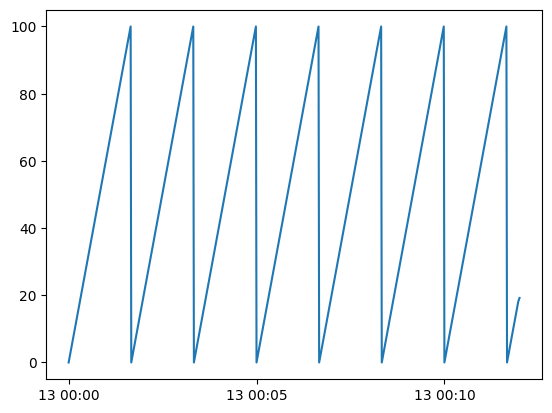

In [7]:
time, pila, ms = generate_pila()
plt.plot(time, pila)
plt.show()

In [8]:
def convert_to_anal_data(PVId, FieldTime, Value, MSec=0, HistState=32, PVState=2.656, UserNr=-1, PVStateAscii='my:G SN100'):
    '''
    Преобразует данные сигнала в DataFrame, готовый для выгрузки в архив.

    Создает pandas DataFrame с заданными параметрами сигнала в соответствии
    с требуемой структурой данных для архивного хранения.

    Args:
        PVId: Идентификатор технологической переменной
        FieldTime: Массив временных меток (datetime)
        Value: Массив значений сигнала
        MSec (int, optional): Массив миллисекунд для временных меток. По умолчанию 0.
        HistState (int, optional): Состояние истории. По умолчанию 32.
        PVState (float, optional): Состояние переменной. По умолчанию 2.656.
        UserNr (int, optional): Идентификатор пользователя. По умолчанию -1.
        PVStateAscii (str, optional): Текстовое описание состояния. По умолчанию 'my:G SN100'.

    Returns:
        pd.DataFrame: DataFrame с колонками:
            - PVId
            - FieldTime
            - MSec
            - HistState
            - PVState
            - Value
            - UserNr
            - PVStateAscii
    '''
    df = pd.DataFrame({
        'PVId': PVId,
        'FieldTime': FieldTime,
        'MSec': MSec,
        'HistState': HistState,
        'PVState': PVState,
        'Value': Value,
        'UserNr': UserNr,
        'PVStateAscii': PVStateAscii
    })
    return df

## Синусоидальный сигнал

In [9]:
def generate_sin(today_date=str(pd.Timestamp("today").date()), start_time="00:00:00",
                 period=100, duration_hours=0.2, min_value=0, max_value=100, points_per_period=100):
  '''
  Генерирует аналоговый синусоидальный сигнал с заданными параметрами.

    Args:
        today_date (str, optional): Дата в формате 'YYYY-MM-DD'. По умолчанию - текущая дата.
        start_time (str, optional): Время начала сигнала в формате 'HH:MM:SS'. По умолчанию '00:00:00'.
        period (int, optional): Период сигнала в секундах. По умолчанию 100.
        duration_hours (float, optional): Длительность сигнала в часах. По умолчанию 0.2.
        min_value (int, optional): Минимальное значение сигнала. По умолчанию 0.
        max_value (int, optional): Максимальное значение сигнала. По умолчанию 100.
        points_per_period (int, optional): Количество точек на один период. По умолчанию 100.

    Returns:
        tuple: Кортеж из трех элементов:
            - time_steps (pd.DatetimeIndex): Массив временных меток
            - sine_values (np.array): Массив значений сигнала
            - msecs (np.array): Массив миллисекунд для каждой временной метки
  '''
  duration_sec = duration_hours * 3600
  total_points = int(duration_sec * points_per_period / period)

  full_start_time = pd.Timestamp(today_date + ' ' + start_time)
  full_end_time = full_start_time + pd.Timedelta(seconds=duration_sec)

  # Генерация временной оси
  time_in_periods = np.linspace(0, duration_sec / period, total_points)

  # Генерация значений сигнала
  amplitude = (max_value - min_value) / 2
  offset = min_value + amplitude
  sine_values = (amplitude * np.sin(2 * np.pi * time_in_periods) + offset).round(3)

  # Генерация времени каждого сигнала
  time_steps = pd.date_range(start=str(full_start_time), end=str(full_end_time), periods=total_points)
  msecs = time_steps.microsecond // 1000
  time_steps = time_steps.floor('s')

  #Возвращение массивов
  return time_steps, sine_values, msecs

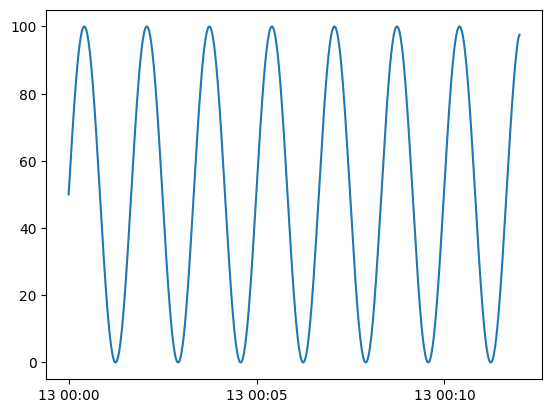

In [10]:
time, sin, ms = generate_sin()
plt.plot(time, sin)
plt.show()

## Экспоненциальный сигнал

In [11]:
def generate_exp(today_date=str(pd.Timestamp("today").date()), start_time="00:00:00",
                 period=100, duration_hours=0.2, min_value=0, max_value=100,
                 points_per_period=100, growth_factor=1.0):
  '''
  Генерирует аналоговый экспоненциальный сигнал с заданными параметрами.

  Функция создает временной ряд значений экспоненциального сигнала, который растет
  по экспоненте в течение периода, а затем резко падает до минимального значения.

    Args:
        today_date (str, optional): Дата в формате 'YYYY-MM-DD'. По умолчанию - текущая дата.
        start_time (str, optional): Время начала сигнала в формате 'HH:MM:SS'. По умолчанию '00:00:00'.
        period (int, optional): Период сигнала в секундах. По умолчанию 100.
        duration_hours (float, optional): Длительность сигнала в часах. По умолчанию 0.2.
        min_value (int, optional): Минимальное значение сигнала. По умолчанию 0.
        max_value (int, optional): Максимальное значение сигнала. По умолчанию 100.
        points_per_period (int, optional): Количество точек на один период. По умолчанию 100.
        growth_factor (float, optional): Фактор роста экспоненты (чем больше, тем круче рост). По умолчанию 5.

    Returns:
        tuple: Кортеж из трех элементов:
            - time_steps (pd.DatetimeIndex): Массив временных меток
            - exp_values (np.array): Массив значений сигнала
            - msecs (np.array): Массив миллисекунд для каждой временной метки
  '''
  duration_sec = duration_hours * 3600
  total_points = int(duration_sec * points_per_period / period)

  full_start_time = pd.Timestamp(today_date + ' ' + start_time)
  full_end_time = full_start_time + pd.Timedelta(seconds=duration_sec)

  # Генерация временной оси в пределах одного периода [0, 1]
  time_in_period = np.linspace(0, 1, points_per_period, endpoint=False)

  # Генерация значений сигнала
  one_period_values = min_value + (max_value - min_value) * (np.exp(growth_factor * time_in_period) - 1) / (np.exp(growth_factor) - 1)
  exp_values = np.tile(one_period_values, int(np.ceil(total_points / points_per_period)))[:total_points].round(3)

  # Генерация времени каждого сигнала
  time_steps = pd.date_range(start=str(full_start_time), end=str(full_end_time), periods=total_points)
  msecs = time_steps.microsecond // 1000
  time_steps = time_steps.floor('s')

  #Возвращение массивов
  return time_steps, exp_values, msecs

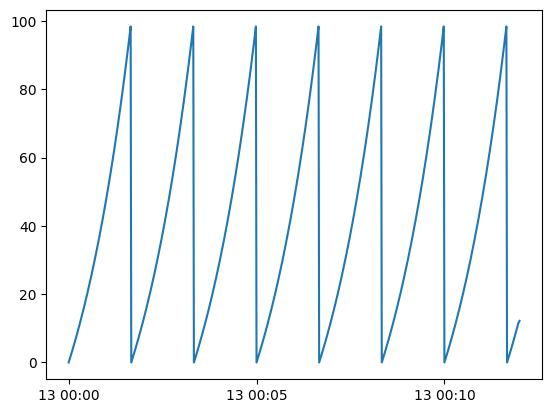

In [12]:
time, exp, ms = generate_exp(growth_factor=1)
plt.plot(time, exp)
plt.show()

## Рандомный сигнал

In [13]:
def generate_random(today_date=str(pd.Timestamp("today").date()), start_time="00:00:00",
                    duration_hours=0.2, min_value=0, max_value=100,
                    points_per_second=0.5, chaos=0.5, seed=None):
    """
    Генерирует случайный сигнал с заданными параметрами.

    Args:
        today_date (str): Дата в формате 'YYYY-MM-DD'. По умолчанию - текущая дата.
        start_time (str): Время начала в формате 'HH:MM:SS'. По умолчанию '00:00:00'.
        duration_hours (float): Длительность сигнала в часах. По умолчанию 0.2.
        min_value (int): Минимальное значение. По умолчанию 0.
        max_value (int): Максимальное значение. По умолчанию 100.
        points_per_second (int): Точек на секунду. По умолчанию 0.5.
        chaos (float): Уровень хаотичности от 0 до 1 (0 - нет шума, 1 - рандомные значения).
          По умолчанию 0.5.
        seed (int): Фиксирование начального состояния генератора чисел. По умолчанию None.

    Returns:
        tuple: Кортеж из трех элементов:
            - time_steps (pd.DatetimeIndex): Массив временных меток
            - random_values (np.array): Массив значений сигнала
            - msecs (np.array): Массив миллисекунд для каждой временной метки
    """
    if seed is not None:
        np.random.seed(seed)

    duration_sec = duration_hours * 3600
    total_points = int(duration_sec * points_per_second)

    full_start_time = pd.Timestamp(today_date + ' ' + start_time)
    full_end_time = full_start_time + pd.Timedelta(seconds=duration_sec)

    # Генерируется нормальная функция
    func = np.vectorize(lambda x: np.exp(-(x**2)) - np.exp(-1))
    signal = func(np.linspace(-1, 1, total_points))

    # Смещение в диапазон между min и max значением
    signal = (max_value - min_value) * signal - min_value

    # Добавляется шум
    noise = np.random.normal(loc=0, scale=chaos * (max_value - min_value) * 0.4, size=total_points)
    signal = signal + noise

    # Обрезка значений до min/max
    random_values = np.clip(signal, min_value, max_value).round(3)

    # Генерация времени каждого сигнала
    time_steps = pd.date_range(start=str(full_start_time), end=str(full_end_time), periods=total_points)
    msecs = time_steps.microsecond // 1000
    time_steps = time_steps.floor('s')

    return time_steps, random_values, msecs

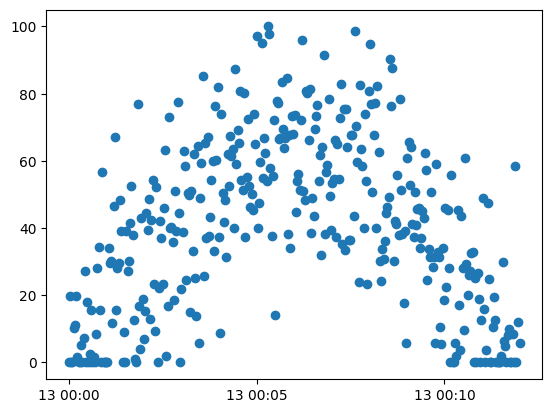

In [14]:
time, randoms, ms = generate_random(chaos=0.5)
plt.scatter(time, randoms)
plt.show()